In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [2]:
data_3a = pd.read_excel('Fig.3a.xlsx', engine='openpyxl', index_col=0, sheet_name='Sheet1')
data_3a2 = pd.read_excel('Fig.3a.xlsx', engine='openpyxl', index_col=0, sheet_name='Sheet2')

In [3]:
data_3a.columns = ['lib', 'caller', 'quantity', 
                   'bowtie2_total', 'bowtie2_fscore', 'bowtie2_recall', 'bowtie2_precision', 
                   'None',  'bwa_total', 'bwa_fscore', 'bwa_recall', 'bwa_precision', 
                   'novo_total', 'novo_fscore', 'novo_recall', 'novo_precision',]

In [4]:
data_3a = data_3a.drop(['None'], axis=1).drop(['Samples'])
data_3a = data_3a[~data_3a.index.isna()]

In [5]:
mutect_fscores  = { 'TruSeq1000':{}, 'TruSeq250':{}, 'TruSeq100':{}, 'TruSeq10':{}, 'TruSeq1':{}, 'Nextera100':{}, 'Nextera10':{}, 'Nextera1':{} }
strelka_fscores = { 'TruSeq1000':{}, 'TruSeq250':{}, 'TruSeq100':{}, 'TruSeq10':{}, 'TruSeq1':{}, 'Nextera100':{}, 'Nextera10':{}, 'Nextera1':{} }
sniper_fscores  = { 'TruSeq1000':{}, 'TruSeq250':{}, 'TruSeq100':{}, 'TruSeq10':{}, 'TruSeq1':{}, 'Nextera100':{}, 'Nextera10':{}, 'Nextera1':{} }

for i, row_i in data_3a.iterrows():
    if row_i.caller == 'muTect2':
        mutect_fscores['{}{}'.format(row_i.lib, row_i.quantity)]['bowtie2'] = row_i.bowtie2_fscore
        mutect_fscores['{}{}'.format(row_i.lib, row_i.quantity)]['bwa'] = row_i.bwa_fscore
        mutect_fscores['{}{}'.format(row_i.lib, row_i.quantity)]['novo'] = row_i.novo_fscore
    
    elif row_i.caller == 'strelka':
        strelka_fscores['{}{}'.format(row_i.lib, row_i.quantity)]['bowtie2'] = row_i.bowtie2_fscore
        strelka_fscores['{}{}'.format(row_i.lib, row_i.quantity)]['bwa'] = row_i.bwa_fscore
        strelka_fscores['{}{}'.format(row_i.lib, row_i.quantity)]['novo'] = row_i.novo_fscore
        
    elif row_i.caller == 'somaticSniper':
        sniper_fscores['{}{}'.format(row_i.lib, row_i.quantity)]['bowtie2'] = row_i.bowtie2_fscore
        sniper_fscores['{}{}'.format(row_i.lib, row_i.quantity)]['bwa'] = row_i.bwa_fscore
        sniper_fscores['{}{}'.format(row_i.lib, row_i.quantity)]['novo'] = row_i.novo_fscore

In [6]:
mutect_fscores_list = (
          [mutect_fscores['TruSeq1000']['bowtie2'], mutect_fscores['TruSeq250']['bowtie2'], mutect_fscores['TruSeq100']['bowtie2'], mutect_fscores['TruSeq10']['bowtie2'], mutect_fscores['TruSeq1']['bowtie2'], mutect_fscores['Nextera100']['bowtie2'], mutect_fscores['Nextera10']['bowtie2'], mutect_fscores['Nextera1']['bowtie2']],
          [mutect_fscores['TruSeq1000']['bwa'], mutect_fscores['TruSeq250']['bwa'], mutect_fscores['TruSeq100']['bwa'], mutect_fscores['TruSeq10']['bwa'], mutect_fscores['TruSeq1']['bwa'], mutect_fscores['Nextera100']['bwa'], mutect_fscores['Nextera10']['bwa'], mutect_fscores['Nextera1']['bwa']],
          [mutect_fscores['TruSeq1000']['novo'], mutect_fscores['TruSeq250']['novo'], mutect_fscores['TruSeq100']['novo'], mutect_fscores['TruSeq10']['novo'], mutect_fscores['TruSeq1']['novo'], mutect_fscores['Nextera100']['novo'], mutect_fscores['Nextera10']['novo'], mutect_fscores['Nextera1']['novo']],
)

In [7]:
strelka_fscores_list = (
          [strelka_fscores['TruSeq1000']['bowtie2'], strelka_fscores['TruSeq250']['bowtie2'], strelka_fscores['TruSeq100']['bowtie2'], strelka_fscores['TruSeq10']['bowtie2'], strelka_fscores['TruSeq1']['bowtie2'], strelka_fscores['Nextera100']['bowtie2'], strelka_fscores['Nextera10']['bowtie2'], strelka_fscores['Nextera1']['bowtie2']],
          [strelka_fscores['TruSeq1000']['bwa'], strelka_fscores['TruSeq250']['bwa'], strelka_fscores['TruSeq100']['bwa'], strelka_fscores['TruSeq10']['bwa'], strelka_fscores['TruSeq1']['bwa'], strelka_fscores['Nextera100']['bwa'], strelka_fscores['Nextera10']['bwa'], strelka_fscores['Nextera1']['bwa']],
          [strelka_fscores['TruSeq1000']['novo'], strelka_fscores['TruSeq250']['novo'], strelka_fscores['TruSeq100']['novo'], strelka_fscores['TruSeq10']['novo'], strelka_fscores['TruSeq1']['novo'], strelka_fscores['Nextera100']['novo'], strelka_fscores['Nextera10']['novo'], strelka_fscores['Nextera1']['novo']],
)

In [8]:
sniper_fscores_list = (
          [sniper_fscores['TruSeq1000']['bowtie2'], sniper_fscores['TruSeq250']['bowtie2'], sniper_fscores['TruSeq100']['bowtie2'], sniper_fscores['TruSeq10']['bowtie2'], sniper_fscores['TruSeq1']['bowtie2'], sniper_fscores['Nextera100']['bowtie2'], sniper_fscores['Nextera10']['bowtie2'], sniper_fscores['Nextera1']['bowtie2']],
          [sniper_fscores['TruSeq1000']['bwa'], sniper_fscores['TruSeq250']['bwa'], sniper_fscores['TruSeq100']['bwa'], sniper_fscores['TruSeq10']['bwa'], sniper_fscores['TruSeq1']['bwa'], sniper_fscores['Nextera100']['bwa'], sniper_fscores['Nextera10']['bwa'], sniper_fscores['Nextera1']['bwa']],
          [sniper_fscores['TruSeq1000']['novo'], sniper_fscores['TruSeq250']['novo'], sniper_fscores['TruSeq100']['novo'], sniper_fscores['TruSeq10']['novo'], sniper_fscores['TruSeq1']['novo'], sniper_fscores['Nextera100']['novo'], sniper_fscores['Nextera10']['novo'], sniper_fscores['Nextera1']['novo']],
)

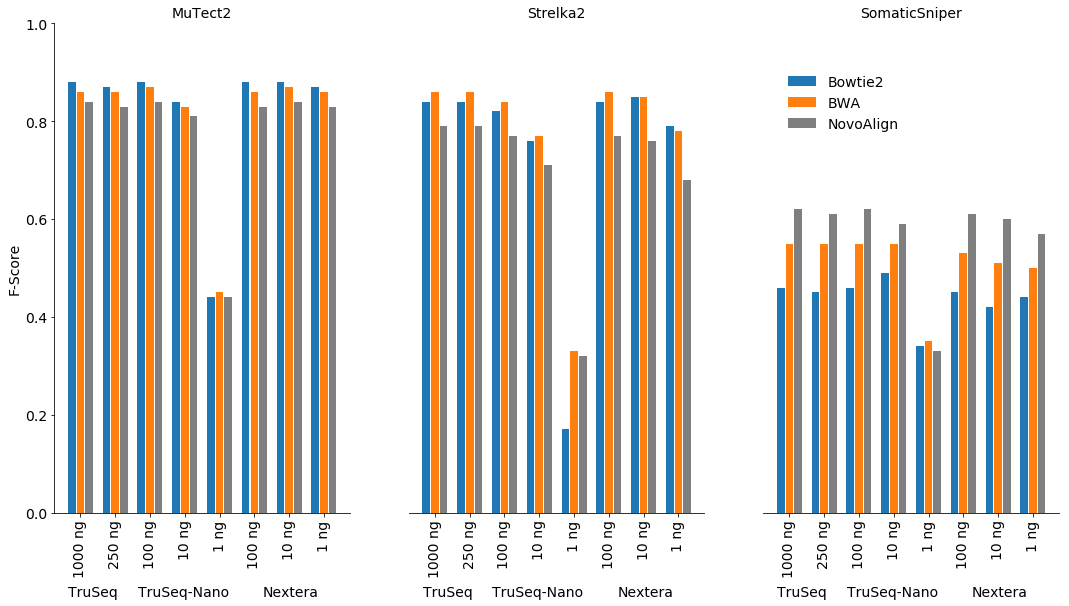

In [9]:
fig = plt.figure(figsize=(18, 9))

X = np.arange(len(mutect_fscores_list[0]))

ax = fig.add_subplot(1, 3, 1)
ax.bar(X + 0.00, mutect_fscores_list[0], color = 'tab:blue', width = 0.22)
ax.bar(X + 0.25, mutect_fscores_list[1], color = 'tab:orange', width = 0.22)
ax.bar(X + 0.5, mutect_fscores_list[2],  color = 'tab:gray', width = 0.22)
#ax.legend(('Bowtie2', 'BWA', 'NovoAlign'), fontsize=12)
ax.set_title('MuTect2', size=14)
_ = plt.xticks( X+0.25, ('1000 ng', '250 ng', '100 ng', '10 ng', '1 ng', '100 ng', '10 ng', '1 ng'), rotation=90, size=14 )
_ = plt.yticks(size=14)
ax.set_ylim((0, 1))
ax.set_ylabel('F-Score', size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0.1, -0.17, 'TruSeq', size=14)
ax.text( 1.9, -0.17, 'TruSeq-Nano', size=14)
ax.text( 5.5, -0.17, 'Nextera', size=14)


ax = fig.add_subplot(1, 3, 2)
ax.bar(X + 0.00, strelka_fscores_list[0], color = 'tab:blue', width = 0.22)
ax.bar(X + 0.25, strelka_fscores_list[1], color = 'tab:orange', width = 0.22)
ax.bar(X + 0.5,  strelka_fscores_list[2],  color = 'tab:gray', width = 0.22)
#ax.legend(('Bowtie2', 'BWA', 'NovoAlign'), fontsize=12)
ax.set_title('Strelka2', size=14)
_ = plt.xticks( X+0.25, ('1000 ng', '250 ng', '100 ng', '10 ng', '1 ng', '100 ng', '10 ng', '1 ng'), rotation=90, size=14 )
ax.set_ylim((0, 1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(-0.1, -0.17, 'TruSeq', size=14)
ax.text( 1.9, -0.17, 'TruSeq-Nano', size=14)
ax.text( 5.5, -0.17, 'Nextera', size=14)


ax = fig.add_subplot(1, 3, 3)
ax.bar(X + 0.00, sniper_fscores_list[0], color = 'tab:blue', width = 0.22)
ax.bar(X + 0.25, sniper_fscores_list[1], color = 'tab:orange', width = 0.22)
ax.bar(X + 0.5,  sniper_fscores_list[2], color = 'tab:gray', width = 0.22)

ax.legend(('Bowtie2', 'BWA', 'NovoAlign'), fontsize=14, bbox_to_anchor=(0.5, 0.92), frameon=False)

ax.set_title('SomaticSniper', size=14)
_ = plt.xticks( X+0.25, ('1000 ng', '250 ng', '100 ng', '10 ng', '1 ng', '100 ng', '10 ng', '1 ng'), rotation=90, size=14 )
ax.set_ylim((0, 1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.text(-0.1, -0.17, 'TruSeq', size=14)
ax.text( 1.9, -0.17, 'TruSeq-Nano', size=14)
ax.text( 5.5, -0.17, 'Nextera', size=14)

_ = plt.savefig('../Main_Figs/Fig_3a.pdf', bbox_inches='tight')

In [10]:
data_3b = pd.read_excel('Fig.3b.xlsx', engine='openpyxl')

In [11]:
data_3b.head(3)

,Unnamed: 0,caller,Samples,total count,F-Score,Recall,Precision
0,FFPE,muTect2,FFG_GZ_T_24h-B,68594.0,0.59,0.79,0.48
1,FFPE,muTect2,FFG_GZ_T_24h-F,48662.0,0.74,0.81,0.69
2,FFPE,muTect2,FFG_IL_T_24h,50714.0,0.70,0.78,0.64


In [12]:
data_3b.columns = ['prep', 'caller', 'samples', 'total_count', 'f_score', 'recall', 'precision']

In [13]:
mutect_fresh_recall    = data_3b[(data_3b.caller=='muTect2') & (data_3b.prep=='Fresh')]['recall']
mutect_fresh_precision = data_3b[(data_3b.caller=='muTect2') & (data_3b.prep=='Fresh')]['precision']
mutect_ffpe_recall     = data_3b[(data_3b.caller=='muTect2') & (data_3b.prep=='FFPE')]['recall']
mutect_ffpe_precision  = data_3b[(data_3b.caller=='muTect2') & (data_3b.prep=='FFPE')]['precision']

strelka_fresh_recall    = data_3b[(data_3b.caller=='Strelka') & (data_3b.prep=='Fresh')]['recall']
strelka_fresh_precision = data_3b[(data_3b.caller=='Strelka') & (data_3b.prep=='Fresh')]['precision']
strelka_ffpe_recall     = data_3b[(data_3b.caller=='Strelka') & (data_3b.prep=='FFPE')]['recall']
strelka_ffpe_precision  = data_3b[(data_3b.caller=='Strelka') & (data_3b.prep=='FFPE')]['precision']

sniper_fresh_recall    = data_3b[(data_3b.caller=='somaticSniper') & (data_3b.prep=='Fresh')]['recall']
sniper_fresh_precision = data_3b[(data_3b.caller=='somaticSniper') & (data_3b.prep=='Fresh')]['precision']
sniper_ffpe_recall     = data_3b[(data_3b.caller=='somaticSniper') & (data_3b.prep=='FFPE')]['recall']
sniper_ffpe_precision  = data_3b[(data_3b.caller=='somaticSniper') & (data_3b.prep=='FFPE')]['precision']

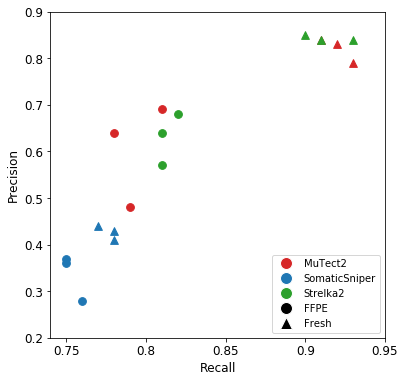

In [14]:
fig = plt.figure(figsize=(6,6))
msize = 60
_ = plt.scatter(mutect_ffpe_recall,   mutect_ffpe_precision,   color='tab:red',  marker='o', s=msize)
_ = plt.scatter(sniper_ffpe_recall,   sniper_ffpe_precision,   color='tab:blue',   marker='o', s=msize)
_ = plt.scatter(strelka_ffpe_recall,  strelka_ffpe_precision,  color='tab:green', marker='o', s=msize)
_ = plt.scatter(mutect_fresh_recall,  mutect_fresh_precision,  color='tab:red',  marker='^', s=msize)
_ = plt.scatter(sniper_fresh_recall,  sniper_fresh_precision,  color='tab:blue',   marker='^', s=msize)
_ = plt.scatter(strelka_fresh_recall, strelka_fresh_precision, color='tab:green', marker='^', s=msize)
_ = plt.xlim((0.74, 0.95))
_ = plt.ylim((0.2, 0.9))
_ = plt.xticks( (0.75, 0.8, 0.85, 0.9, 0.95), (0.75, 0.8, 0.85, 0.9, 0.95), size=12 )
_ = plt.yticks( size=12 )
_ = plt.xlabel('Recall', size=12)
_ = plt.ylabel('Precision', size=12)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='MuTect2',       markerfacecolor='tab:red', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='SomaticSniper', markerfacecolor='tab:blue', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='Strelka2',      markerfacecolor='tab:green', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='FFPE',          markerfacecolor='black', markersize=12),
                   Line2D([0], [0], marker='^', color='w', label='Fresh',         markerfacecolor='black', markersize=12),
                  ]
_ = plt.legend(handles=legend_elements, loc='lower right')

_ = plt.savefig('../Main_Figs/Fig_3b.pdf')